In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import recall_score

import seaborn as sbs

sbs.set_theme()

# %matplotlib qt
%matplotlib inline

In [2]:
df = pd.read_csv("E:\ml project for company\diabitiesPationtData.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThinkness,Insulin,BMI,DiabetiesPedigreefunction,Age,Outcomes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pregnancies                768 non-null    int64  
 1   Glucose                    768 non-null    int64  
 2   BloodPressure              768 non-null    int64  
 3   SkinThinkness              768 non-null    int64  
 4   Insulin                    768 non-null    int64  
 5   BMI                        768 non-null    float64
 6   DiabetiesPedigreefunction  768 non-null    float64
 7   Age                        768 non-null    int64  
 8   Outcomes                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThinkness,Insulin,BMI,DiabetiesPedigreefunction,Age,Outcomes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df[['Glucose', 'BloodPressure', 'SkinThinkness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThinkness', 'Insulin', 'BMI']].replace(0, np.NaN)

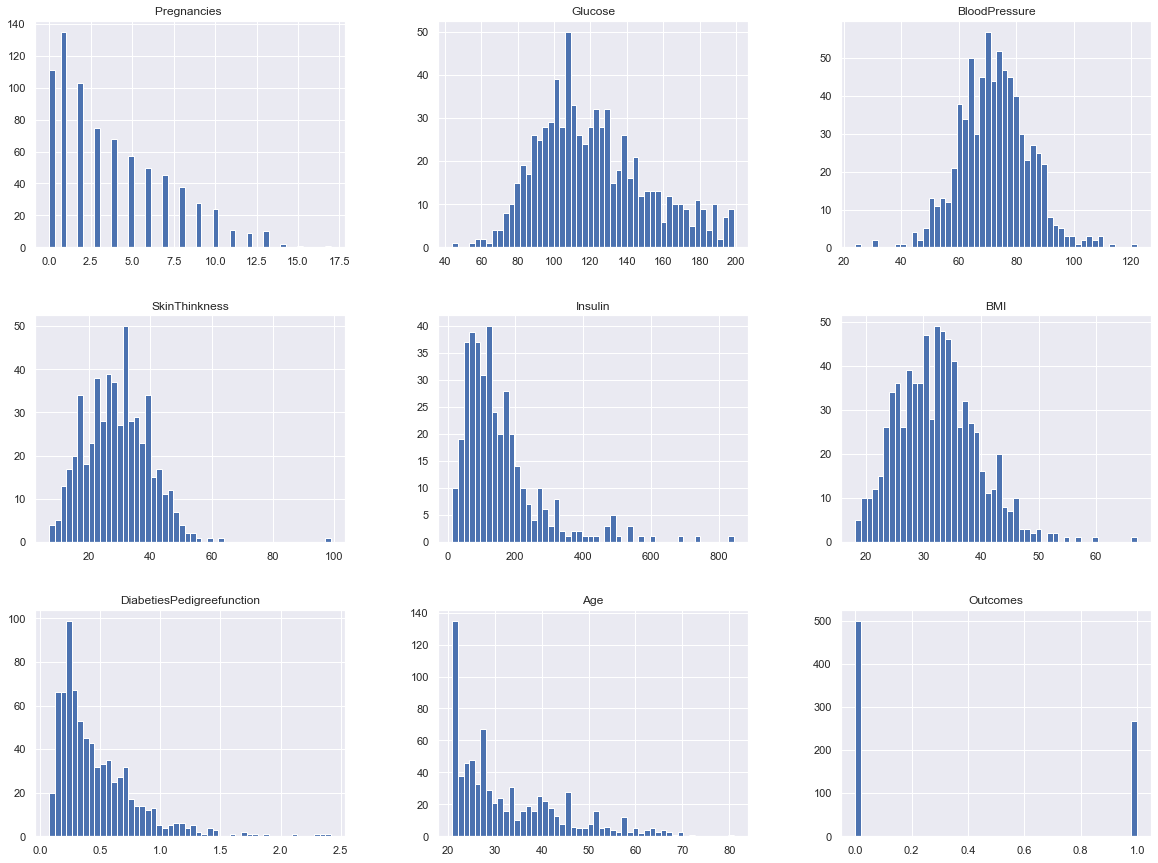

In [6]:
_ = df.hist(bins=50, figsize=(20,15))

## Let's see how many diabetic and healthy persons we do have.

<AxesSubplot: >

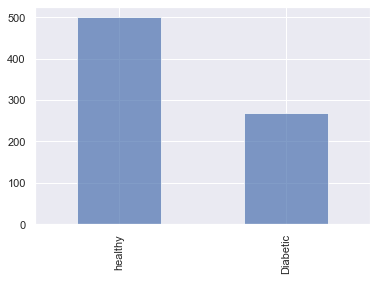

In [7]:
Healthy = df[df['Outcomes'] == 0]
Diabetic = df[df['Outcomes'] == 1]
h_diab = pd.Series({'healthy': Healthy.shape[0],
                   'Diabetic': Diabetic.shape[0]})
h_diab.plot.bar(alpha = 0.7)

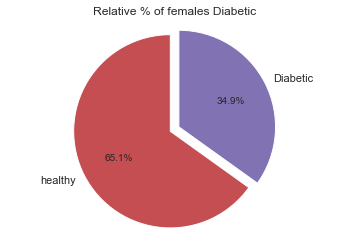

In [8]:
h_diab.plot.pie(startangle= 90,
               explode = [0, 0.1],
               autopct = '%1.1f%%',
               colors = ['C3', 'C4'])
plt.title("Relative % of females Diabetic")
plt.ylabel('')
_ = plt.axis('equal')


In [9]:
df.isnull().sum()

Pregnancies                    0
Glucose                        5
BloodPressure                 35
SkinThinkness                227
Insulin                      374
BMI                           11
DiabetiesPedigreefunction      0
Age                            0
Outcomes                       0
dtype: int64

In [10]:
df.pivot_table(index=['Outcomes'])

,Age,BMI,BloodPressure,DiabetiesPedigreefunction,Glucose,Insulin,Pregnancies,SkinThinkness
Outcomes,,,,,,,,
0,31.190000,30.859674,70.877339,0.429734,110.643863,130.287879,3.298000,27.235457
1,37.067164,35.406767,75.321429,0.550500,142.319549,206.846154,4.865672,33.000000


In [11]:
def replace_null_values(df):
    for col in df.columns:
        df.loc[(df['Outcomes']==0) & (df[col].isnull()), col] = df[df['Outcomes'] == 0][col].median()
        df.loc[(df['Outcomes']==1) & (df[col].isnull()), col] = df[ df['Outcomes'] == 1][col].median()
    print(df.isnull().sum())
    
replace_null_values(df)

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThinkness                0
Insulin                      0
BMI                          0
DiabetiesPedigreefunction    0
Age                          0
Outcomes                     0
dtype: int64


In [12]:
label_encoder = preprocessing.LabelEncoder()
df['Outcomes'] = label_encoder.fit_transform(df['Outcomes'])

In [13]:
categ_cols = [col for col in df.columns if df[col].dtype.name == 'category']
print(categ_cols)

[]


In [14]:
def one_hot_encoder(df, columns):
    df_dummy = df.copy()
    df_dummy = pd.get_dummies(df, columns=columns, drop_first=True)
    return df_dummy

result = one_hot_encoder(df, categ_cols)
result

,Pregnancies,Glucose,BloodPressure,SkinThinkness,Insulin,BMI,DiabetiesPedigreefunction,Age,Outcomes
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


# Train and Test Spliting


In [15]:
from sklearn.model_selection import train_test_split

X = result.drop('Outcomes', axis=1)
y = df['Outcomes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

rmse  = lambda labels, predictions: np.sqrt(mean_squared_error(labels, predictions))

lg_model = LogisticRegression(max_iter=1000,C=0.01).fit(X_train, y_train)
lg_predictions = lg_model.predict(X_test)
rmse(y_test, lg_predictions)

0.4767312946227962

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lg_predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [400, 500, 600], 
              'max_leaf_nodes': [14, 15, 16]}
random_forest = RandomForestClassifier(n_jobs=-1)

grid_search_rf = GridSearchCV(random_forest, 
                              param_grid=param_grid, 
                              cv=3,
                              scoring='recall',
                              return_train_score=True)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

{'max_leaf_nodes': 15, 'n_estimators': 600}

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_search_rf.predict(X_test)))
print(recall_score(y_test, grid_search_rf.predict(X_test)))
print(roc_auc_score(y_test, grid_search_rf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        99
           1       0.81      0.87      0.84        55

    accuracy                           0.88       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.89      0.88      0.88       154

0.8727272727272727


NameError: name 'roc_auc_score' is not defined